<a href="https://colab.research.google.com/github/andreac941/tutorials/blob/main/A1b_DL_TC5033_AD2023_andrea_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

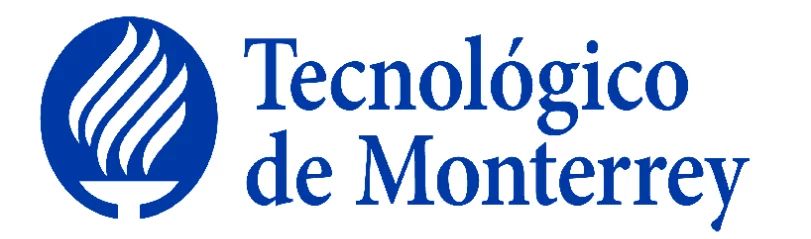


## **Maestría en Inteligencia Artificial Aplicada**

## **Course: Advanced Machine Learning Methods**
### Tecnológico de Monterrey
### Lead Professor: José Antonio Cantoral Ceballos

## **Activity 1b**
### **Implementing a Fully Connected Network for Kaggle ASL Dataset**

# TC 5033

- Alexis Hernández Martínez A01016308
- Rigoberto Vega Escudero A01793132
- Rodrigo Rodríguez Rodríguez A01183284
- Andrea Carolina Treviño Garza A01034993

## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [1]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


In [2]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
DATA_PATH = ''
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train_df.shape

(27455, 785)

In [5]:
valid_df.shape

(7172, 785)

### Importar Images

In [6]:
len(train_df['label'])

27455

In [7]:
y_train = np.array(train_df['label']).reshape(len(train_df['label']),1)
y_val = np.array(valid_df['label']).reshape(len(valid_df['label']),1)

In [8]:

del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [9]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    """
    Split the dataset (x, y) into validation and test sets.

    Parameters:
    - x: Input data (features)
    - y: Labels
    - pct: Percentage of data to be allocated for the validation set
    - shuffle: Whether to shuffle the data before splitting

    Returns:
    - x_val: Validation data
    - y_val: Validation labels
    - x_test: Test data
    - y_test: Test labels
    """

    # Determine the number of samples to allocate for validation
    num_samples = len(x)
    num_val_samples = int(num_samples * pct)

    # Optionally shuffle the data
    if shuffle:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        x = x[indices]
        y = y[indices]

    # Split the data
    x_val, x_test = x[:num_val_samples], x[num_val_samples:]
    y_val, y_test = y[:num_val_samples], y[num_val_samples:]

    return x_val, y_val, x_test, y_test


In [10]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [11]:
#Validation of the shape/size of each data set:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(27455, 784)
(3586, 784)
(3586, 784)
(27455, 1)
(3586, 1)
(3586, 1)


In [12]:
### The following - Letters define with a hand sign with movement were deleted (j & z)
alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

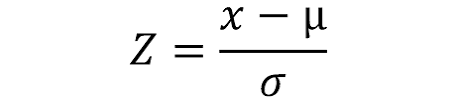

In [13]:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [14]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

In [15]:
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

In [16]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(27455, 784)
(3586, 784)
(3586, 784)
(27455, 1)
(3586, 1)
(3586, 1)


In [17]:
y_train.max()

23

### Graficar muestras

[[16]]


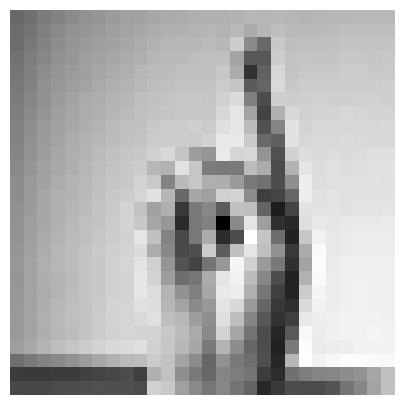

In [19]:

import random

# Function to plot images
def plot_samples(samples, labels=None, title=None):
    """
    Plot a list of image samples.

    Parameters:
    - samples: List of image data (numpy arrays)
    - labels: Optional list of labels
    - title: Title for the plot
    """
    num_samples = len(samples)
    num_rows = 1
    num_cols = num_samples

    plt.figure(figsize=(15, 5))
    if title:
        plt.suptitle(title, fontsize=16)

    for i in range(num_samples):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(samples[i].reshape(28, 28), cmap='gray')  # Reshape to (28, 28)
        plt.axis('off')
        if labels:
            plt.title(f"Label: {labels[i]}")

# Randomly select 3 samples
random_indices = random.sample(range(len(x_train)), 1)
sample_images = x_train[random_indices]
print(y_train[random_indices])

# Plot the random samples
plot_samples(sample_images)

plt.show()

In [71]:
#Dictionary for understanding to which letter corresponds each number:
letters = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', }
letters[0]

'A'

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [21]:
def create_mini_batches(mb_size, x, y, shuffle=True):
    """
    Create mini-batches of data.

    Parameters:
    - mb_size: Size of each mini-batch
    - x: Input data
    - y: Labels
    - shuffle: Whether to shuffle the data before creating mini-batches

    Returns:
    - A generator that yields mini-batches of (x_batch, y_batch)
    """
    assert x.shape[0] == y.shape[0], 'Error on samples size'
    total_data = x.shape[0]

    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]

    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))



In [22]:
import numpy as np

def initialize_parameters(input_size, neurons):
    """
    Initialize parameters (weights and biases) for a fully connected network.

    Parameters:
    - input_size: Number of input features
    - neurons: List of integers specifying the number of neurons in each layer

    Returns:
    - A dictionary containing initialized parameters for each layer
    """
    parameters = {}
    num_layers = len(neurons)

    for layer in range(num_layers):
        if layer == 0:
            # Input layer to the first hidden layer
            W = np.random.randn(neurons[0], input_size) * 0.001
            b = np.zeros((neurons[0], 1))
        else:
            # Hidden layers or output layer
            W = np.random.randn(neurons[layer], neurons[layer-1]) * 0.001
            b = np.zeros((neurons[layer], 1))

        parameters[f'W{layer + 1}'] = W
        parameters[f'b{layer + 1}'] = b

    return parameters

# Example usage:
input_size = 28 * 28
neurons = [200, 23]
parameters = initialize_parameters(input_size, neurons)

# Print the shapes of initialized parameters
for layer in range(1, len(neurons) + 2):
    if f'W{layer}' in parameters:
        print(f"Shape of W{layer}: {parameters[f'W{layer}'].shape}")
    if f'b{layer}' in parameters:
        print(f"Shape of b{layer}: {parameters[f'b{layer}'].shape}")


Shape of W1: (200, 784)
Shape of b1: (200, 1)
Shape of W2: (23, 200)
Shape of b2: (23, 1)


## Nuestra clase Linear, ReLU y Sequential

In [23]:
class np_tensor(np.ndarray): pass

a = np.array([0, 0])
b = a.view(np_tensor)

In [24]:
type(a)

numpy.ndarray

In [25]:
type(b)

__main__.np_tensor

In [26]:
a == b

np_tensor([ True,  True])

In [27]:
a is b

False

###  Clase Linear

In [28]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters utilizando Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X): # esta el foward de la clase lineal
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

In [29]:
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)
    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0


### Clase Sequential

In [30]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

### Cost Function

In [32]:

def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # Cost
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calculate gradients
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

In [33]:
type(x_train[:64].T)

numpy.ndarray

In [34]:
type(x_train[:64].T.view(np_tensor))

__main__.np_tensor

### Loop de entrenamiento

In [35]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_mini_batches(mb_size, x_train, y_train)):
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward()
            model.update(learning_rate)
        print(f'Epoch {epoch}:costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')


In [36]:
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_mini_batches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total



### Create your model and train it

In [37]:
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, 24)])
mb_size = 512
learning_rate = 1e-4
epochs = 30

In [38]:
train(model, epochs, mb_size, learning_rate)

Epoch 0:costo: 1.1472065631024047, accuracy: 0.5306748466257669
Epoch 1:costo: 0.5466879793357606, accuracy: 0.6408254322364751
Epoch 2:costo: 0.34691519098565, accuracy: 0.6879531511433352
Epoch 3:costo: 0.23009062202013564, accuracy: 0.7069157836029002
Epoch 4:costo: 0.16188316220418925, accuracy: 0.7189068600111544
Epoch 5:costo: 0.1134790954894991, accuracy: 0.728388176240937
Epoch 6:costo: 0.08206654133961566, accuracy: 0.7345231455660903
Epoch 7:costo: 0.06632540812644563, accuracy: 0.7448410485220301
Epoch 8:costo: 0.05333558278658899, accuracy: 0.741494701617401
Epoch 9:costo: 0.04587696236317125, accuracy: 0.7440044617958729
Epoch 10:costo: 0.04243750959073488, accuracy: 0.7459564974902398
Epoch 11:costo: 0.03374626291509203, accuracy: 0.7540435025097602
Epoch 12:costo: 0.029406501578116275, accuracy: 0.752649191299498
Epoch 13:costo: 0.02494519300685307, accuracy: 0.7512548800892359
Epoch 14:costo: 0.026302889799726035, accuracy: 0.7579475738984941
Epoch 15:costo: 0.022833171

In [39]:
print(accuracy(x_test, y_test, mb_size))

0.7559955382041271


[[4]]


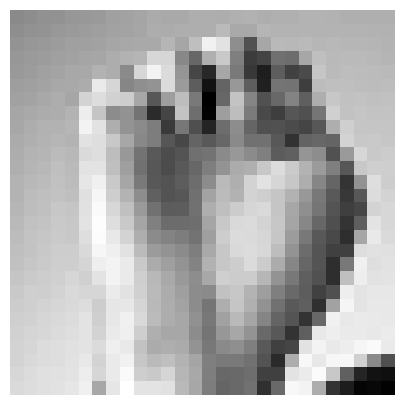

el valor predicho es: 4, el valor real es: 4


In [79]:
#idx = np.random.randint(len(y_test))
random_indices = random.sample(range(len(x_test)), 1)
sample_images = x_test[random_indices]
print(y_test[random_indices])

# Plot the random samples
plot_samples(sample_images)

plt.show()
pred = model.predict(x_test[random_indices[0]].reshape(-1, 1))
print(f'el valor predicho es: {pred}, el valor real es: {y_test[random_indices[0]][0]}')

#print(random_indices[0])
#print(idx)

### Test your model on Random data from your test set